In [1]:
import osmnx as ox
import momepy
import geopandas as gpd
import shapely
from shapely.geometry import LineString
import os

/home/virgilxw/miniconda3/lib/python3.10/site-packages/osmnx/projection.py:3: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd


In [2]:
local_crs = 3414

place = "Singapore"

latlng = (1.29, 103.85)
dist = 30000

study_area = gpd.read_file("./source/Singapore_studyArea.shp").to_crs(epsg=4326)

# assuming your geodataframe is called `gdf` and the geometry column is called `geometry`
study_area_polygon = study_area.geometry.unary_union

In [3]:
## Use osmnx to download all water body polygons within study_area
## and prune them from study_area
    # Download water body polygons
water = ox.geometries.geometries_from_polygon(study_area_polygon, tags={"natural": "water"})
water.head()

created_by   
element_type osmid                 
way          20250182        NaN  \
             20423973        NaN   
             20498763        NaN   
             22721003        NaN   
             22733434        NaN   

                                                                geometry   
element_type osmid                                                         
way          20250182  POLYGON ((103.92047 1.34528, 103.92139 1.34554...  \
             20423973  POLYGON ((103.67731 1.42621, 103.67675 1.42505...   
             20498763  POLYGON ((103.72775 1.31232, 103.72732 1.31062...   
             22721003  POLYGON ((103.76496 1.38275, 103.76513 1.38275...   
             22733434  POLYGON ((103.75442 1.35741, 103.75414 1.35715...   

                                     name leisure access barrier artist_name   
element_type osmid                                                             
way          20250182     Bedok Reservoir     NaN    NaN     NaN         NaN  \
             20423973  Sarimbun Reservoir     NaN    NaN     NaN         NaN   
             20498763       Sungei Jurong     NaN    NaN     NaN         NaN   
             22721003       Pang Sua Pond     NaN    NaN     NaN         NaN   
             22733434       Little Guilin     NaN    NaN     NaN         NaN   

                      artwork_type description image  ... dock  ref basin   
element_type osmid                                    ...                   
way          20250182          NaN         NaN   NaN  ...  NaN  NaN   NaN  \
             20423973          NaN         NaN   NaN  ...  NaN  NaN   NaN   
             20498763          NaN         NaN   NaN  ...  NaN  NaN   NaN   
             22721003          NaN         NaN   NaN  ...  NaN  NaN   NaN   
             22733434          NaN         NaN   NaN  ...  NaN  NaN   NaN   

                      floor level:ref width ways name:de name:ja name:th  
element_type osmid                                                        
way          20250182   NaN       NaN   NaN  NaN     NaN     NaN     NaN  
             20423973   NaN       NaN   NaN  NaN     NaN     NaN     NaN  
             20498763   NaN       NaN   NaN  NaN     NaN     NaN     NaN  
             22721003   NaN       NaN   NaN  NaN     NaN     NaN     NaN  
             22733434   NaN       NaN   NaN  NaN     NaN     NaN     NaN  

[5 rows x 75 columns]

In [4]:
## Prune study area
study_area = study_area.overlay(water, how='difference')

<AxesSubplot: >

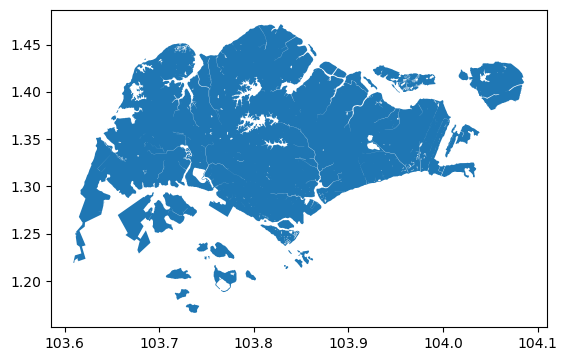

In [5]:
study_area.plot()

In [6]:
# buildings = ox.geometries.geometries_from_place(place, tags={'building':True})
# buildings = ox.geometries.geometries_from_point(latlng, tags={'building':True}, dist=dist)
buildings = ox.geometries.geometries_from_polygon(study_area_polygon, tags={'building':True})
buildings.head()

amenity                   geometry addr:street   
element_type osmid                                                      
node         518475196     NaN  POINT (103.81225 1.30876)         NaN  \
             965698989     NaN  POINT (103.82913 1.29577)         NaN   
             965700669     NaN  POINT (103.82906 1.29618)         NaN   
             965700671     NaN  POINT (103.82825 1.29639)         NaN   
             965700673     NaN  POINT (103.83048 1.29633)         NaN   

                       entrance alt_name bench  bin  bus highway location   
element_type osmid                                                          
node         518475196      NaN      NaN   NaN  NaN  NaN     NaN      NaN  \
             965698989      NaN      NaN   NaN  NaN  NaN     NaN      NaN   
             965700669      NaN      NaN   NaN  NaN  NaN     NaN      NaN   
             965700671      NaN      NaN   NaN  NaN  NaN     NaN      NaN   
             965700673      NaN      NaN   NaN  NaN  NaN     NaN      NaN   

                        ... cooling:method ways building:1992-2017   
element_type osmid      ...                                          
node         518475196  ...            NaN  NaN                NaN  \
             965698989  ...            NaN  NaN                NaN   
             965700669  ...            NaN  NaN                NaN   
             965700671  ...            NaN  NaN                NaN   
             965700673  ...            NaN  NaN                NaN   

                       name:1992-2017 name:vi garden:type   
element_type osmid                                          
node         518475196            NaN     NaN         NaN  \
             965698989            NaN     NaN         NaN   
             965700669            NaN     NaN         NaN   
             965700671            NaN     NaN         NaN   
             965700673            NaN     NaN         NaN   

                       parking:condition:both parking:lane:both end_date   
element_type osmid                                                         
node         518475196                    NaN               NaN      NaN  \
             965698989                    NaN               NaN      NaN   
             965700669                    NaN               NaN      NaN   
             965700671                    NaN               NaN      NaN   
             965700673                    NaN               NaN      NaN   

                       roof:level  
element_type osmid                 
node         518475196        NaN  
             965698989        NaN  
             965700669        NaN  
             965700671        NaN  
             965700673        NaN  

[5 rows x 422 columns]

In [7]:
buildings = buildings[buildings.geom_type == "Polygon"].reset_index(drop=True)
buildings = buildings[["geometry"]].to_crs(local_crs)
print(buildings.geom_type.value_counts())


Polygon    112736
Name: count, dtype: int64


In [8]:
# Use the unary_union method to merge adjacent or overlapping polygons
merged = buildings.geometry.unary_union

# Convert the merged geometry back to a GeoDataFrame
merged_buildings_gdf = gpd.GeoDataFrame(geometry=[merged])
buildings = merged_buildings_gdf.explode()
buildings = buildings[buildings.geom_type == "Polygon"].reset_index(drop=True)

/tmp/ipykernel_24237/1234733396.py:6: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  buildings = merged_buildings_gdf.explode()


In [9]:
buildings["uID"] = range(len(buildings))

In [10]:
print(buildings.geom_type.value_counts())
buildings.head()

Polygon    76522
Name: count, dtype: int64


,geometry,uID
0,"POLYGON ((4098.105 23706.883, 4109.145 23706.8...",0
1,"POLYGON ((4169.087 23688.953, 4169.269 23731.3...",1
2,"POLYGON ((4129.786 23795.994, 4196.953 23795.9...",2
3,"POLYGON ((3940.171 23898.114, 3939.741 23952.6...",3
4,"POLYGON ((3908.968 23952.996, 3934.866 23953.1...",4


In [11]:
osm_graph= ox.graph.graph_from_polygon(study_area_polygon, network_type='drive')
osm_graph = ox.projection.project_graph(osm_graph, to_crs=local_crs)
streets = ox.graph_to_gdfs(
    osm_graph,
    nodes=False,
    edges=True,
    node_geometry=False,
    fill_edge_geometry=True
)

streets.head()
streets = streets.drop(columns=[col for col in streets.columns if col != 'geometry'])

In [12]:
from shapely.geometry import LineString

# Assuming your GeoDataFrame is named 'gdf'
line_strings = []
for geometry in streets.geometry:
    if geometry.geom_type == 'LineString':
        line_strings.append(geometry)
    elif geometry.geom_type == 'MultiLineString':
        line_strings.extend(list(geometry))

In [14]:
collection = shapely.GeometryCollection(line_strings)  # combine to a single object
noded = shapely.node(collection)  # add missing nodes
streets_noded_gdf = gpd.GeoDataFrame(geometry=gpd.GeoSeries(noded), crs=local_crs)


<AxesSubplot: >

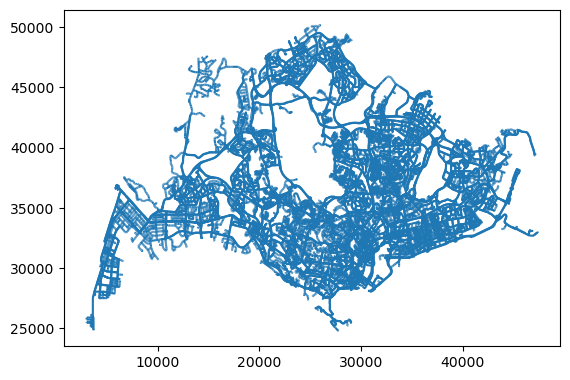

In [15]:
streets_noded_gdf.plot()

<AxesSubplot: >

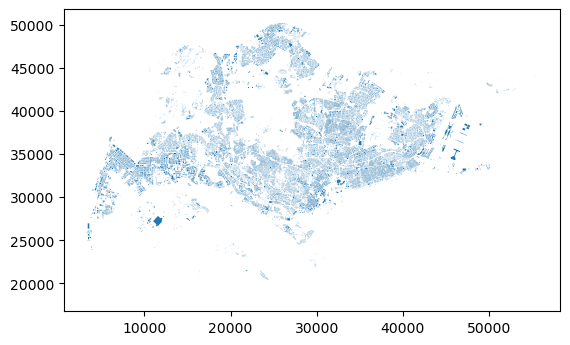

In [17]:
buildings.plot()

<AxesSubplot: >

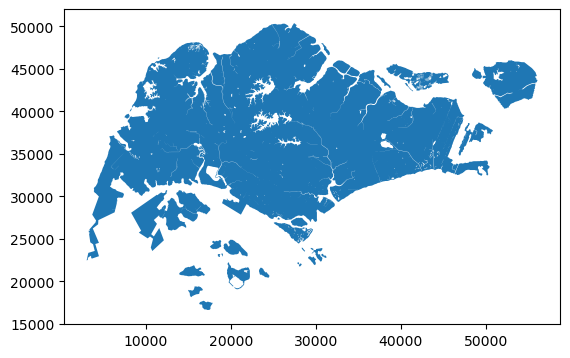

In [19]:
study_area = study_area.to_crs(local_crs)
study_area.plot()

In [20]:
## create directory ./out/singapore if it does not exist
def create_dir(dir):
    if not os.path.exists(dir):
        os.makedirs(dir)
        
create_dir("./out/singapore")

In [21]:
## convert streets_noded_gdf, buildings, and study_area to local_crs
streets_noded_gdf.to_parquet("./out/singapore/streets.pq")

buildings.to_parquet("./out/singapore/buildings.pq")

study_area.to_parquet("./out/singapore/study_area.pq")

In [ ]:
# # Create a polygon geodataframe from creating a 2 meter buffer around every line in streets_noded_gdf and dissolve it into study_area

# streets_noded_gdf_buffer = dgpd.from_geopandas(streets_noded_gdf, npartitions=4)
# streets_noded_gdf_buffer.buffer(2)

# study_area_dgpd = dgpd.from_geopandas(study_area, npartitions=4).append(streets_noded_gdf_buffer).dissolve()

In [ ]:
# test = study_area_dgpd.compute()

In [ ]:
# # dissolve streets_noded_gdf_buffer into study_area into one multipolygon in a geodataframe
# concat = pd.concat([study_area, streets_noded_gdf_buffer])

# study_area_polygon = gdf.geometry.unary_union
# study_area = gpd.GeoDataFrame(geometry=[dissolved_geom], crs=gdf.crs)

In [ ]:
# enclosures = momepy.enclosures(noded_gdf , limit= study_area.to_crs(local_crs))

In [ ]:
# enclosures.plot()

In [ ]:
# # Perform a spatial join of the overlapping polygons with themselves
# spatial_join = gpd.sjoin(enclosures, enclosures, how="inner", op="intersects")

# # Count the number of overlapping polygons for each polygon
# overlapping_counts = spatial_join.groupby(["eID_left"]).size()

# # Get the polygons that overlap with more than one other polygon
# overlapping_count = overlapping_counts[overlapping_counts > 30].index.tolist()
